In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\exchange_rate.csv", parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset
print(df.head())


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


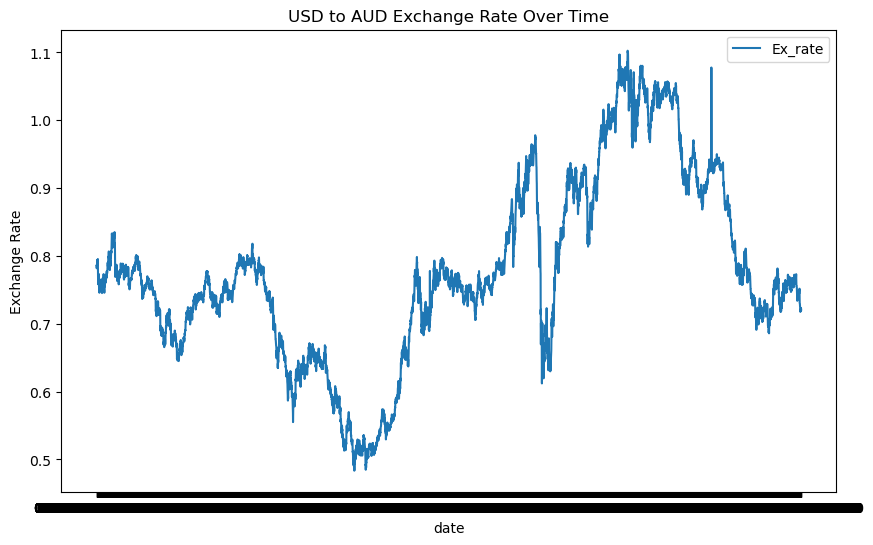

In [12]:
import matplotlib.pyplot as plt
# Plot the time series for USD to Australian Dollar
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Ex_rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [14]:
print(df.isnull().sum())


Ex_rate    0
dtype: int64


In [24]:
df['Ex_rate'].interpolate(inplace=True)


In [30]:
# Example: Handling outliers using Z-score
from scipy import stats

z_scores = stats.zscore(df['Ex_rate'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]


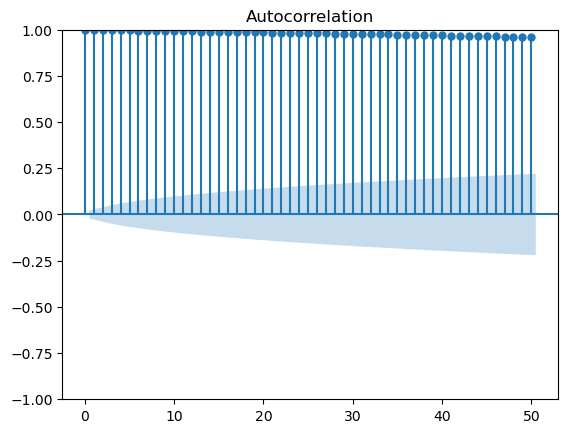

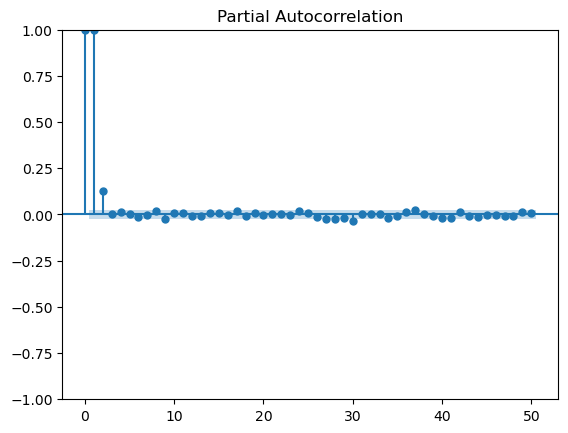

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['Ex_rate'], lags=50)
plot_pacf(df['Ex_rate'], lags=50)
plt.show()


In [110]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(1,1,1))  
model_fit = model.fit()
print(model_fit.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 5219
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Mon, 19 Aug 2024   AIC                              6.000
Time:                        19:36:55   BIC                             25.680
Sample:                    01-01-1990   HQIC                            12.883
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


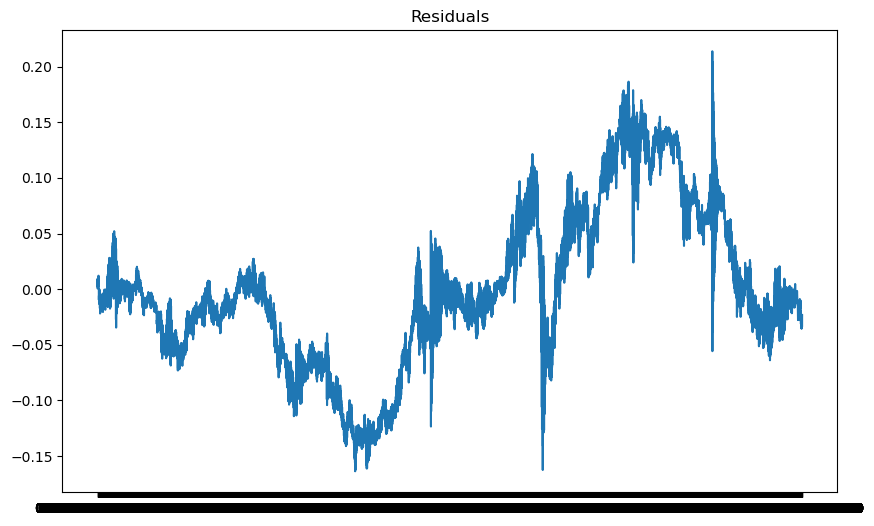

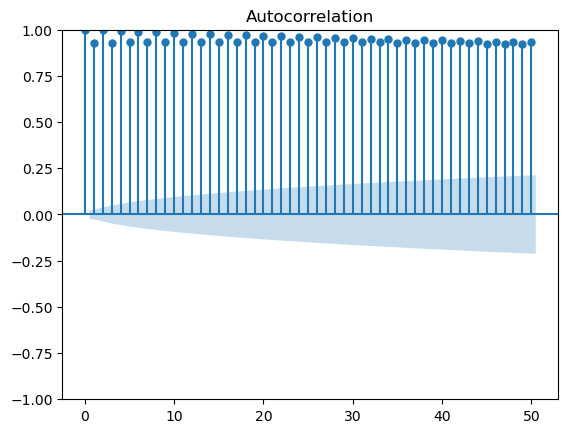

In [50]:
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=50)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


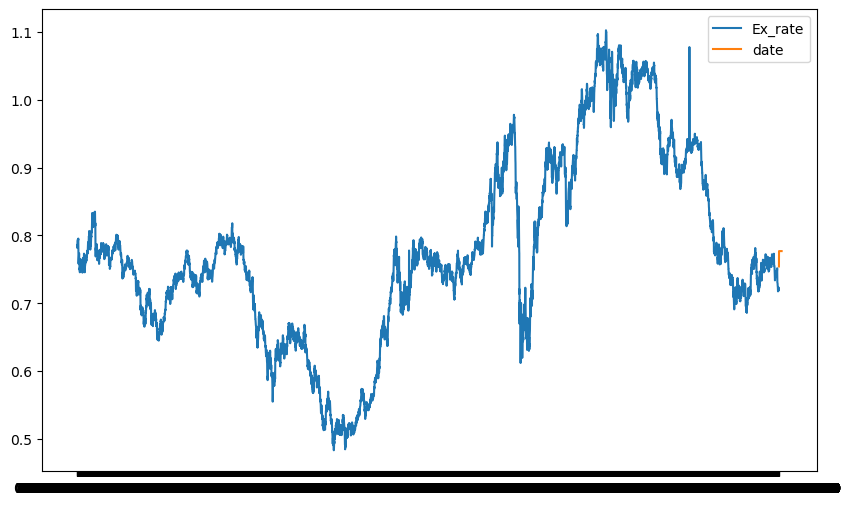

In [56]:
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Ex_rate')
plt.plot(forecast.index, forecast, label='date')
plt.legend()
plt.show()

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit(optimized=True)

# Summary of the model
print(model_fit.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.573
Trend:                         Additive   BIC                         -77513.623
Seasonal:                      Additive   AICC                        -77624.482
Seasonal Periods:                    12   Date:                 Mon, 19 Aug 2024
Box-Cox:                          False   Time:                         19:19:31
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702054                alpha                 True
smoothing_trend          

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


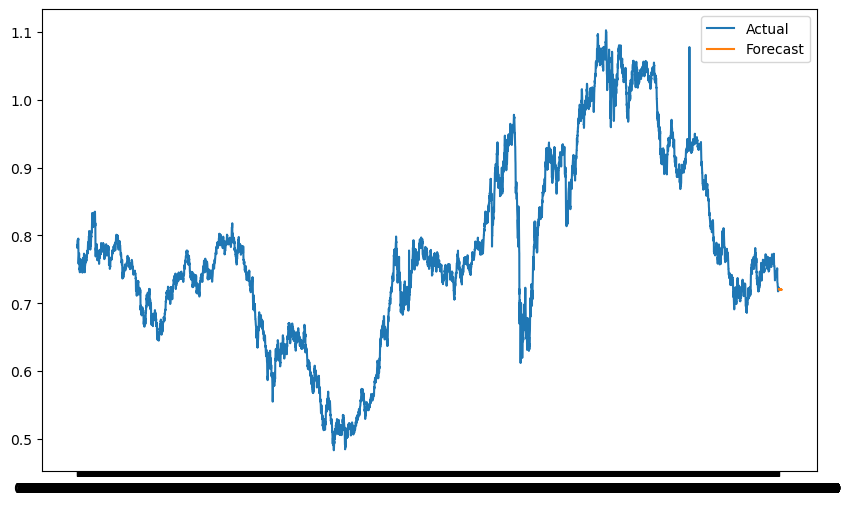

In [60]:
forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [102]:
import pandas as pd

# Load the dataset with correct parsing of dates
df = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\exchange_rate.csv", parse_dates=['date'], index_col='date')

# Check the index type and frequency
print(df.index)
df = df.asfreq('B') 
# Fit the ARIMA model after setting the frequency
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=30)

# Extract predicted mean and confidence intervals
forecast_index = pd.date_range(df.index[-1], periods=31, freq='B')[1:]
forecast_values = forecast.predicted_mean
forecast_values.index = forecast_index

print(forecast_values)




Index(['01-01-1990 00:00', '02-01-1990 00:00', '03-01-1990 00:00',
       '04-01-1990 00:00', '05-01-1990 00:00', '06-01-1990 00:00',
       '07-01-1990 00:00', '08-01-1990 00:00', '09-01-1990 00:00',
       '10-01-1990 00:00',
       ...
       '01-10-2010 00:00', '02-10-2010 00:00', '03-10-2010 00:00',
       '04-10-2010 00:00', '05-10-2010 00:00', '06-10-2010 00:00',
       '07-10-2010 00:00', '08-10-2010 00:00', '09-10-2010 00:00',
       '10-10-2010 00:00'],
      dtype='object', name='date', length=7588)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2010-01-01    0.0
2010-01-04    0.0
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    0.0
2010-01-11    0.0
2010-01-12    0.0
2010-01-13    0.0
2010-01-14    0.0
2010-01-15    0.0
2010-01-18    0.0
2010-01-19    0.0
2010-01-20    0.0
2010-01-21    0.0
2010-01-22    0.0
2010-01-25    0.0
2010-01-26    0.0
2010-01-27    0.0
2010-01-28    0.0
2010-01-29    0.0
2010-02-01    0.0
2010-02-02    0.0
2010-02-03    0.0
2010-02-04    0.0
2010-02-05    0.0
2010-02-08    0.0
2010-02-09    0.0
2010-02-10    0.0
2010-02-11    0.0
Freq: B, Name: predicted_mean, dtype: float64
